<a href="https://colab.research.google.com/github/AnHaiTrinh/handson-ml/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import sklearn

import tensorflow as tf
from tensorflow import keras 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

images = np.array([china, flower])

batch_size, height, width, channels = images.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[3, :, :, 0] = 1
filters[:, 3, :, 1] = 1

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

(-0.5, 639.5, 426.5, -0.5)

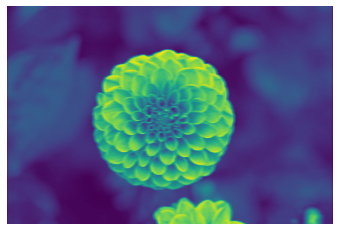

In [ ]:
plt.imshow(outputs[1, :, :, 0])
plt.axis("off")

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu")

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output = tf.nn.max_pool(images, ksize=3, strides=3, padding="VALID")
output

<tf.Tensor: shape=(2, 142, 213, 3), dtype=float32, numpy=
array([[[[0.68235296, 0.7882353 , 0.90588236],
         [0.68235296, 0.7882353 , 0.90588236],
         [0.6901961 , 0.79607844, 0.9137255 ],
         ...,
         [0.98039216, 0.9843137 , 1.        ],
         [0.9843137 , 0.9882353 , 1.        ],
         [0.9882353 , 0.99215686, 1.        ]],

        [[0.6862745 , 0.7921569 , 0.9098039 ],
         [0.6901961 , 0.7921569 , 0.9098039 ],
         [0.69411767, 0.79607844, 0.9098039 ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 1.        ],
         [0.99215686, 0.99607843, 1.        ]],

        [[0.69411767, 0.79607844, 0.90588236],
         [0.69411767, 0.79607844, 0.9098039 ],
         [0.69803923, 0.8       , 0.9137255 ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 1.        ],
         [0.99607843, 0.99607843, 1.        ]],

        ...,

        [[0.5058824 , 0.5764706 , 

In [ ]:
global_avg_pool = keras.layers.GlobalAveragePooling2D()

In [ ]:
from functools import partial

DefConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation="relu", padding="SAME")

model = keras.models.Sequential([
                                 DefConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
                                 keras.layers.MaxPooling2D(pool_size=2),
                                 DefConv2D(filters=128),
                                 DefConv2D(filters=128),
                                 keras.layers.MaxPooling2D(pool_size=2),
                                 DefConv2D(filters=256),
                                 DefConv2D(filters=256),
                                 keras.layers.MaxPooling2D(pool_size=2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128, activation="relu"),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=64, activation="relu"),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/50
1719/1719 [==============================] - 20s 9ms/step - loss: 0.5394 - accuracy: 0.8107 - val_loss: 0.3461 - val_accuracy: 0.8722
Epoch 2/50
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3363 - accuracy: 0.8800 - val_loss: 0.3053 - val_accuracy: 0.8856
Epoch 3/50
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2909 - accuracy: 0.8957 - val_loss: 0.2777 - val_accuracy: 0.8966
Epoch 4/50
1719/1719 [==============================] - 18s 11ms/step - loss: 0.2653 - accuracy: 0.9049 - val_loss: 0.2772 - val_accuracy: 0.9022
Epoch 5/50
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2452 - accuracy: 0.9117 - val_loss: 0.2778 - val_accuracy: 0.8998
Epoch 6/50
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2256 - accuracy: 0.9187 - val_loss: 0.2869 - val_accuracy: 0.9030
Epoch 7/50
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2089 - accuracy: 0.9236 - val_loss: 0.2778 - val_

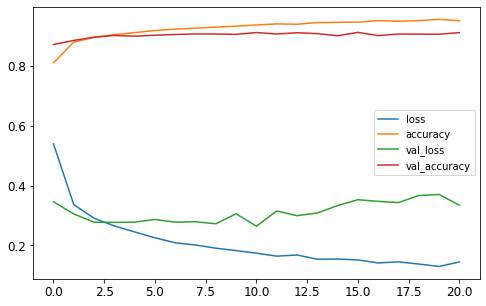

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2894 - accuracy: 0.9075


[0.28943824768066406, 0.9075000286102295]

In [ ]:
class InceptionModule(keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", padding="SAME", **kwargs):
    super().__init__(**kwargs)
    DefaultConv2DLayer = partial(keras.layers.Conv2D, kernel_size=1, strides=strides, activation=activation, padding=padding)
    self.hidden_layers = [
                        [DefaultConv2DLayer(filters=filters[0])],
                        [DefaultConv2DLayer(filters=filters[4]),
                         DefaultConv2DLayer(filters=filters[1], kernel_size=3)],
                        [DefaultConv2DLayer(filters=filters[5]),
                         DefaultConv2DLayer(filters=filters[2], kernel_size=5)],
                        [keras.layers.MaxPooling2D(pool_size=3, strides=strides, padding=padding),
                         DefaultConv2DLayer(filters=filters[3])]
    ]
  def call(self, inputs):
    outputs = []
    for hidden_layer in self.hidden_layers:
      Z = inputs
      for layer in hidden_layer:
        Z = layer(Z)
      outputs.append(Z)
    return tf.concat(outputs, axis=3)

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
inception = InceptionModule([64, 128, 32, 32, 96, 16])
inception.call(tf.expand_dims(flower, axis=0)).shape

TensorShape([1, 427, 640, 256])

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
                        DefaultConv2D(filters, strides=strides),
                        keras.layers.BatchNormalization(),
                        self.activation,
                        DefaultConv2D(filters),
                        keras.layers.BatchNormalization()]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
                          DefaultConv2D(filters, kernel_size=1, strides=strides),
                          keras.layers.BatchNormalization()]
  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
      skip_Z = layer(skip_Z)
    output = Z + skip_Z
    return self.activation(output)

In [ ]:
residualUnit = ResidualUnit(64, strides=2)
residualUnit(tf.expand_dims(flower, axis=0)).shape

TensorShape([1, 214, 320, 64])

In [ ]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28, 28, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        3136      
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 residual_unit_1 (ResidualUn  (None, 7, 7, 64)         74240     
 it)                                                             
                                                      

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 61s 60ms/step - loss: 0.4902 - accuracy: 0.8326 - val_loss: 0.3725 - val_accuracy: 0.8656
Epoch 2/50
860/860 [==============================] - 49s 57ms/step - loss: 0.3390 - accuracy: 0.8816 - val_loss: 1.1208 - val_accuracy: 0.7632
Epoch 3/50
860/860 [==============================] - 50s 58ms/step - loss: 0.2887 - accuracy: 0.8976 - val_loss: 0.3673 - val_accuracy: 0.8662
Epoch 4/50
860/860 [==============================] - 49s 57ms/step - loss: 0.2528 - accuracy: 0.9080 - val_loss: 0.2773 - val_accuracy: 0.8978
Epoch 5/50
860/860 [==============================] - 58s 67ms/step - loss: 0.2283 - accuracy: 0.9160 - val_loss: 0.2854 - val_accuracy: 0.8956
Epoch 6/50
860/860 [==============================] - 55s 64ms/step - loss: 0.2108 - accuracy: 0.9214 - val_loss: 0.3070 - val_accuracy: 0.8882
Epoch 7/50
860/860 [==============================] - 54s 63ms/step - loss: 0.2050 - accuracy: 0.9260 - val_loss: 0.2561 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2883 - accuracy: 0.9013


[0.2883381247520447, 0.9013000130653381]

In [ ]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102981632/102967424 [==============================] - 1s 0us/step


(-0.5, 223.5, 223.5, -0.5)

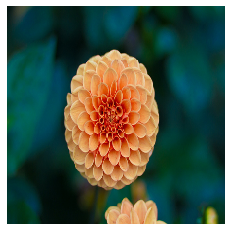

In [ ]:
images_resized = tf.image.resize(images, [224, 224])
plt.imshow(images_resized[1], interpolation="nearest")
plt.axis("off")

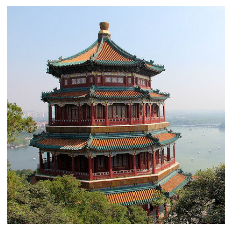

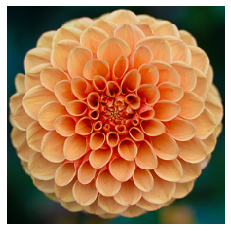

In [ ]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plt.imshow(images_resized[0], interpolation="nearest")
plt.axis("off")
plt.show()
plt.imshow(images_resized[1], interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
y_proba = model.predict(inputs)

In [ ]:
y_proba.shape

(2, 1000)

In [ ]:
top_K = keras.applications.resnet50.decode_predictions(y_proba, top=3)
for image_index in range(len(images)):
  print("Image #{}".format(image_index))
  for class_id, name, y_proba in top_K[image_index]:
    print(" {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
  print()

49152/35363 [=========================================] - 0s 0us/step
Image #0
 n03877845 - palace       43.39%
 n02825657 - bell_cote    43.07%
 n03781244 - monastery    11.70%

Image #1
 n04522168 - vase         53.96%
 n07930864 - cup          9.52%
 n11939491 - daisy        4.97%



In [ ]:
import tensorflow_datasets as tfds
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples #3670
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

**New split API**

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

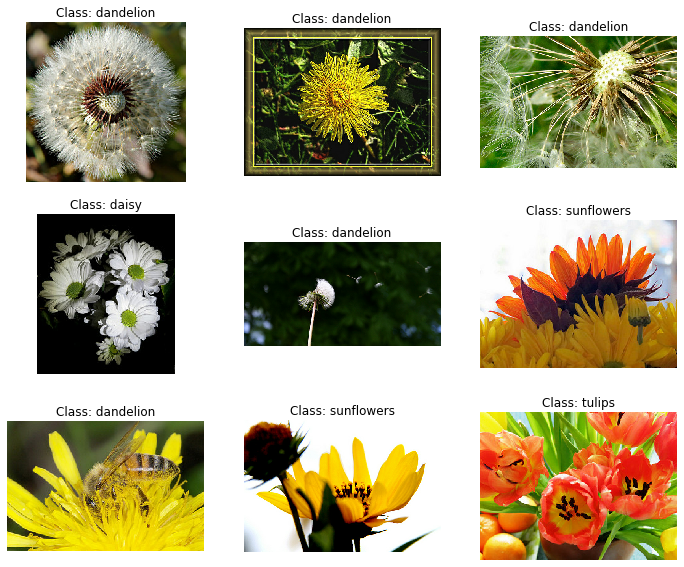

In [ ]:
plt.figure(figsize=(12, 10))
for index, (image, label) in enumerate(train_set_raw.take(9)):
  plt.subplot(3, 3, index + 1)
  plt.imshow(image, interpolation="nearest")
  plt.title("Class: {}".format(class_names[label]))
  plt.axis("off")

In [ ]:
def central_crop(image):
  width, height = tf.shape(image)[0], tf.shape(image)[1]
  min_dim = tf.reduce_min([width, height])
  top_crop = (width - min_dim) // 4
  bottom_crop = width - top_crop
  left_crop = (height - min_dim) // 4
  right_crop = height - left_crop
  return image[top_crop:bottom_crop, left_crop:right_crop]
def randomzied_crop(image):
  min_dim = tf.reduce_min([tf.shape(image)[0], tf.shape(image)[1]]) * 90 // 100
  return tf.image.random_crop(image, [min_dim, min_dim, 3])

In [ ]:
def preprocess(image, label, randomized=False):
  if randomized:
    image = randomzied_crop(image)
    image = tf.image.random_flip_left_right(image)
  else:
    image = central_crop(image)
  resized_image = tf.image.resize(image, [224, 224])
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

In [ ]:
batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomized=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

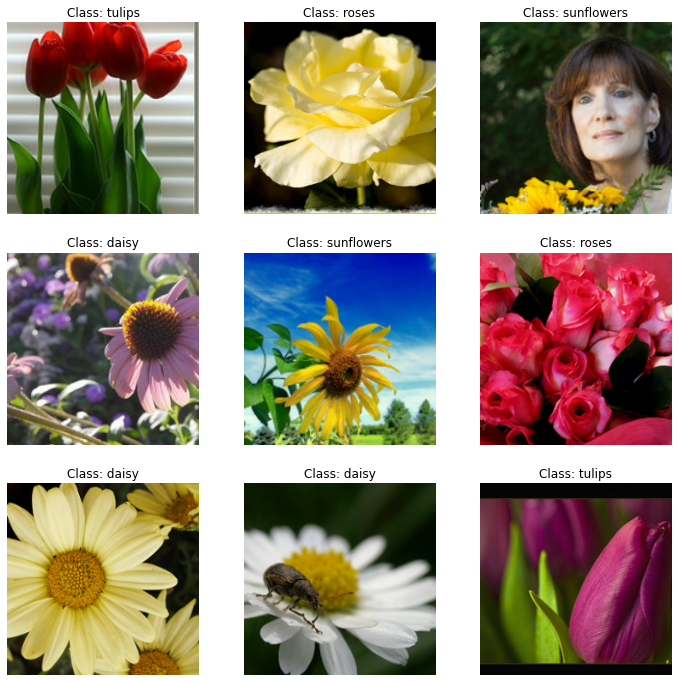

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
  for index in range(9):
    plt.subplot(3, 3, index + 1)
    plt.imshow(X_batch[index] / 2 + 0.5)
    plt.title("Class: {}".format(class_names[y_batch[index]]))
    plt.axis("off")

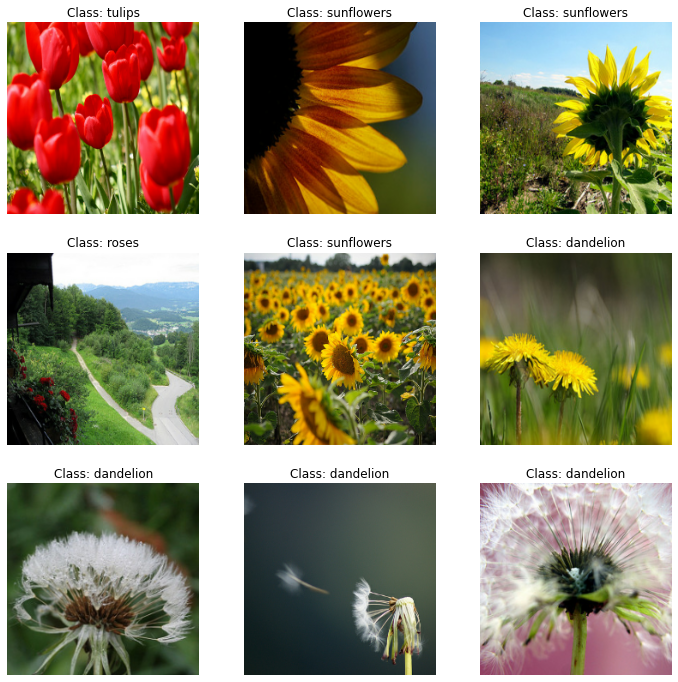

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=10)

Epoch 1/10
86/86 [==============================] - 58s 163ms/step - loss: 1.5040 - accuracy: 0.7856 - val_loss: 1.1711 - val_accuracy: 0.8272
Epoch 2/10
86/86 [==============================] - 14s 160ms/step - loss: 0.6278 - accuracy: 0.8968 - val_loss: 0.8440 - val_accuracy: 0.8493
Epoch 3/10
86/86 [==============================] - 14s 165ms/step - loss: 0.3771 - accuracy: 0.9190 - val_loss: 0.7276 - val_accuracy: 0.8640
Epoch 4/10
86/86 [==============================] - 13s 157ms/step - loss: 0.2529 - accuracy: 0.9390 - val_loss: 0.7147 - val_accuracy: 0.8640
Epoch 5/10
86/86 [==============================] - 13s 155ms/step - loss: 0.2222 - accuracy: 0.9451 - val_loss: 0.7686 - val_accuracy: 0.8713
Epoch 6/10
86/86 [==============================] - 13s 154ms/step - loss: 0.1900 - accuracy: 0.9473 - val_loss: 0.5997 - val_accuracy: 0.8750
Epoch 7/10
86/86 [==============================] - 13s 155ms/step - loss: 0.1636 - accuracy: 0.9539 - val_loss: 0.6789 - val_accuracy: 0.8713

In [ ]:
for layer in base_model.layers:
  layer.trainable = True
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40,
                    callbacks=[early_stopping_cb])

Epoch 1/40
86/86 [==============================] - 59s 643ms/step - loss: 0.3403 - accuracy: 0.8892 - val_loss: 0.4285 - val_accuracy: 0.8658
Epoch 2/40
86/86 [==============================] - 54s 629ms/step - loss: 0.1180 - accuracy: 0.9575 - val_loss: 0.2681 - val_accuracy: 0.9026
Epoch 3/40
86/86 [==============================] - 54s 633ms/step - loss: 0.0790 - accuracy: 0.9753 - val_loss: 0.2436 - val_accuracy: 0.9210
Epoch 4/40
86/86 [==============================] - 54s 627ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.2259 - val_accuracy: 0.9228
Epoch 5/40
86/86 [==============================] - 54s 629ms/step - loss: 0.0299 - accuracy: 0.9895 - val_loss: 0.2662 - val_accuracy: 0.9283
Epoch 6/40
86/86 [==============================] - 54s 629ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.2606 - val_accuracy: 0.9044
Epoch 7/40
86/86 [==============================] - 54s 629ms/step - loss: 0.0182 - accuracy: 0.9953 - val_loss: 0.2935 - val_accuracy: 0.9228

In [ ]:
model.evaluate(test_set, steps=int(dataset_size*0.1 / batch_size))

11/11 [==============================] - 2s 134ms/step - loss: 0.2311 - accuracy: 0.9403


[0.23106080293655396, 0.9403409361839294]

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling()(base_model.ouput)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.models.Model(inputs=base_model.input, outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              weights=[0.8, 0.2],
              optimizer=optimizer, metrics=["accuracy"])

In [ ]:
def maximum_precisions(precisions):
  return np.flip(np.maximum.accumulate(np.flip(precisions)))

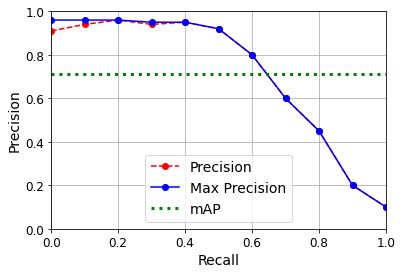

In [ ]:
recalls = np.linspace(0, 1, 11)

precisions = [0.91, 0.94, 0.96, 0.94, 0.95, 0.92, 0.80, 0.60, 0.45, 0.20, 0.10]
max_precisions = maximum_precisions(precisions)
mAP = max_precisions.mean()
plt.plot(recalls, precisions, "ro--", label="Precision")
plt.plot(recalls, max_precisions, "bo-", label="Max Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [mAP, mAP], "g:", linewidth=3, label="mAP")
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower center", fontsize=14)

In [ ]:
X = images_resized.numpy()

conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=2, padding="VALID")
output = conv_transpose(X)
output.shape

TensorShape([2, 449, 449, 5])

(-0.5, 448.5, 448.5, -0.5)

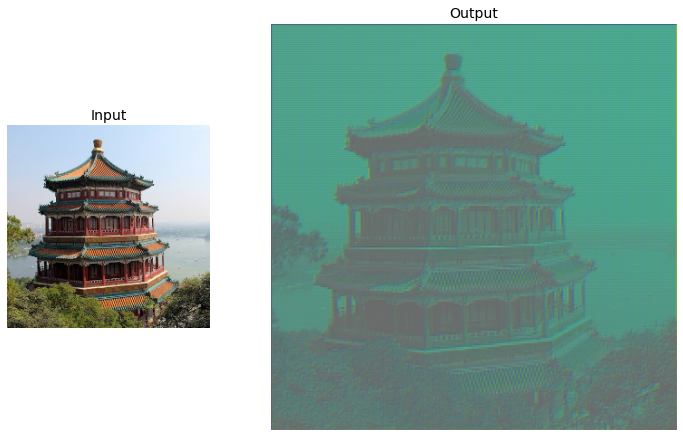

In [ ]:
def normalize(X):
  return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(normalize(output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax2.axis("off")

In [ ]:
def upscale_images(images, stride, kernel_size):
  batch_size, height, width, channels = images.shape
  upscaled = np.zeros((batch_size,
                        (height - 1) * stride + 2 * kernel_size - 1,
                        (width - 1) * stride + 2 * kernel_size - 1,
                        channels))
  upscaled[:,
            kernel_size - 1:(height - 1) * stride + kernel_size:stride,
            kernel_size - 1:(width - 1) * stride + kernel_size:stride,
            :] = images
  return upscaled

In [ ]:
upscaled = upscale_images(X, stride=2, kernel_size=3)
weights, biases = conv_transpose.weights
reversed_filters = np.flip(weights.numpy(), axis=[0, 1])
reversed_filters = np.transpose(reversed_filters, [0, 1, 3, 2])
manual_output = tf.nn.conv2d(upscaled, reversed_filters, strides=1, padding="VALID")

(-0.5, 448.5, 448.5, -0.5)

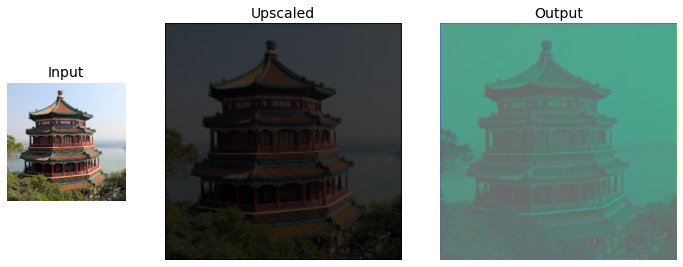

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Upscaled", fontsize=14)
ax2.imshow(upscaled[0], interpolation="bicubic")
ax2.axis("off")
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_title("Output", fontsize=14)
ax3.imshow(normalize(manual_output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax3.axis("off")